In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X = pd.read_csv("X_static.csv")
y = pd.read_csv("y.csv").values.ravel()
X_pca_input = pd.read_csv("X_pca_input.csv")

#pca
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_pca_input)
print("Explained variance ratio:", pca.explained_variance_ratio_.sum())

Explained variance ratio: 0.9549810408789687


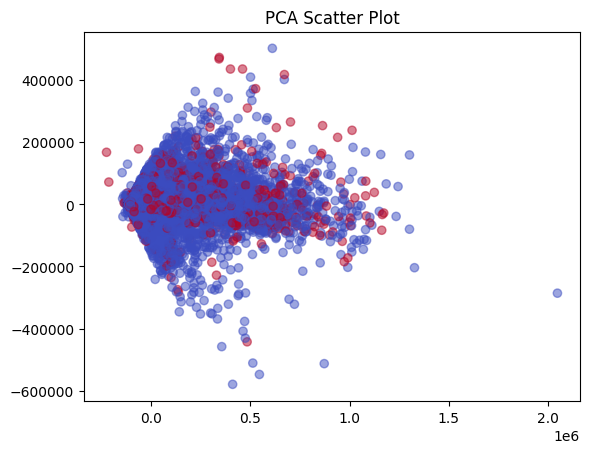

In [12]:
#plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA Scatter Plot")
plt.show()


In [13]:
print("hi")

hi


In [14]:
#rf
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)


In [15]:
print("Random Forest:")
print(classification_report(y, y_pred_rf))
print("ROC AUC:", roc_auc_score(y, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23364
           1       1.00      0.99      0.99      6636

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC: 0.9952781252931436


In [16]:
#Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred_dt = dt.predict(X)

In [17]:
print("Decision Tree:")
print(classification_report(y, y_pred_dt))
print("ROC AUC:", roc_auc_score(y, y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23364
           1       1.00      0.99      0.99      6636

    accuracy                           1.00     30000
   macro avg       1.00      0.99      1.00     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC: 0.9945870805396658
